# MQ-6

## Ro calculation

### Specifications

#### Standard Work Condition

    Vc (Circuit Voltage)       :  5v +/- 0.1
    Vh (Heating Voltage)       :  5v +/- 0.1
    Rl (Load Resistance)       :  20KOhm
    Rh (Heater Resistance)     :  33Ohm +/- 5%
    Ph (Heating consumption)   :  less than 750mw
    

#### Sensitivity Characteristic:

    Rs (Sensing Resistance)    : 10kOhm  -  60kOhm (10000ppm LPG)
    Preheat Time               : Over 24 hour
    
    Detecting Concentration Scope:
        LPG, Iso-Butane, Propane, LNG:  200ppm  - 10000ppm 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
## Gas concentration values referenced in the datasheet

POINTS = {
    # Liquefied Petroleum Gas
    'lpg' : {
        'p1' : {'x': 200,   'y':2.025},
        'p2' : {'x': 500,   'y':1.352},
        'p3' : {'x': 800,   'y':1.094},
        'p4' : {'x': 1000,  'y':1.000},
        'p5' : {'x': 1565,  'y':0.832},
        'p6' : {'x': 2000,  'y':0.740},
        'p7' : {'x': 3000,  'y':0.633},
        'p8' : {'x': 5000,  'y':0.516},
        'p9' : {'x': 10000, 'y':0.390}
    },

    # Hydrogen
    'h2' : {
        'p1' : {'x': 200,   'y':5.716},
        'p2' : {'x': 500,   'y':4.215},
        'p3' : {'x': 800,   'y':3.609},
        'p4' : {'x': 1000,  'y':3.349},
        'p5' : {'x': 1565,  'y':2.958},
        'p6' : {'x': 2000,  'y':2.745},
        'p7' : {'x': 3000,  'y':2.440},
        'p8' : {'x': 5000,  'y':2.264},
        'p9' : {'x': 10000, 'y':2.037}
    },

    # Methane
    'ch4' : {
        'p1' : {'x': 200,   'y':2.596},
        'p2' : {'x': 500,   'y':1.799},
        'p3' : {'x': 800,   'y':1.502},
        'p4' : {'x': 1000,  'y':1.352},
        'p5' : {'x': 1565,  'y':1.143},
        'p6' : {'x': 2000,  'y':1.028},
        'p7' : {'x': 3000,  'y':0.897},
        'p8' : {'x': 5000,  'y':0.717},
        'p9' : {'x': 10000, 'y':0.546}
    },

    # Carbon Monoxide
    'co' : {
        'p1' : {'x': 200,   'y':8.831},
        'p2' : {'x': 500,   'y':8.299},
        'p3' : {'x': 800,   'y':7.946},
        'p4' : {'x': 1000,  'y':7.751},
        'p5' : {'x': 1565,  'y':7.560},
        'p6' : {'x': 2000,  'y':7.467},
        'p7' : {'x': 3000,  'y':7.284},
        'p8' : {'x': 5000,  'y':6.930},
        'p9' : {'x': 10000, 'y':6.432}
    },

    'alcohol' : {
        'p1' : {'x': 200,   'y':7.995},
        'p2' : {'x': 500,   'y':6.930},
        'p3' : {'x': 800,   'y':6.313},
        'p4' : {'x': 1000,  'y':6.045},
        'p5' : {'x': 1565,  'y':5.716},
        'p6' : {'x': 2000,  'y':5.473},
        'p7' : {'x': 3000,  'y':5.048},
        'p8' : {'x': 5000,  'y':4.627},
        'p9' : {'x': 10000, 'y':4.242}
    },  
}


AIR = 9.876

GASES = ['lpg', 'h2', 'ch4', 'co', 'alcohol']

In [3]:
# RS value calculation
Rs    = lambda Vcc, Vrl, RL : ((Vcc * RL) / Vrl) - RL

# R0 value calculation
R0    = lambda Rs, air : Rs / air

# RS/Ro value calculation (ratio)
Ratio = lambda Rs, R0: Rs / R0

# log(y) = m.log(x) + b
# m
M     = lambda p1, p2 : (math.log10( p2['y'] / p1['y'] )) / (math.log10(p2['x']/p1['x']))
# b
B     = lambda p, m : math.log10(p['y']) - (m * math.log10(p['x']))

# PPM value calculation 
PPM   = lambda  y, m, b: 10 ** ((math.log10(y) - b) / m)

In [4]:
## Calculate the points to be used for the calculation of _m_ and _b_ according to the _ratio_ value 
def getPoints(racio, values):
    size = len(values)
    for idx in range(size - 1):
        if racio >= values[idx]['y']:
            if idx == 0:
                return (values[0], values[1])
            return(values[idx - 1], values[idx])
    return(values[size - 2], values[size - 1])

In [5]:
pList = {}
for gas in GASES:
    pList[gas] = list(POINTS[gas].values())

In [6]:
col_list = ["date", "mq6_1", "mq6_2"]
df = pd.read_csv('RoomInNormalDay_Jun[14 - 15].csv', usecols=col_list)

df['date']= pd.to_datetime(df['date'])

mq6_1 = df[["date","mq6_1"]]
mq6_2 = df[["date","mq6_2"]]

### Ro values to be considered

- __Sensor 1__: 19.24 kOhms
- __Sensor 2__: 27.11 kOhms

In [7]:
# MQ 6 - sensor 1
sensor1 = {}
sensor1['Vcc'] = 5      #volts
sensor1['RL']  = 10     #kOhms
sensor1['AIR'] = AIR 
sensor1['Ro']  = 19.24  #kOhms

# MQ 6 - sensor 2
sensor2 = {}
sensor2['Vcc'] = 5      #volts
sensor2['RL']  = 10     #kOhms
sensor2['AIR'] = AIR 
sensor2['Ro']  = 27.11

In [8]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max

Vrl = [
    mq6_1['mq6_1'].min(),
    mq6_1['mq6_1'].mean(), 
    mq6_1['mq6_1'].quantile(0.25),
    mq6_1['mq6_1'].quantile(0.5),
    mq6_1['mq6_1'].quantile(0.75),
    mq6_1['mq6_1'].max()]

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in Vrl]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []

for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

In [9]:
# Min; Mean; Median; Quantile [0.25, 0.5, 0.75]; Max
Vrl = [
    mq6_2['mq6_2'].min(),
    mq6_2['mq6_2'].mean(), 
    mq6_2['mq6_2'].quantile(0.25),
    mq6_2['mq6_2'].quantile(0.5),
    mq6_2['mq6_2'].quantile(0.75),
    mq6_2['mq6_2'].max()]

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in Vrl]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]

ppm2 = {}
for gas in GASES:
    ppm2[gas] = []

for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))

In [10]:
print(f"Period in which the readings were carried out: {mq6_1['date'].min()} - {mq6_1['date'].max()} \n")

print("Sensor 1")


print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor1['Ratio'][0],3),
               round(sensor1['Ratio'][1],3),
               round(sensor1['Ratio'][2],3),
               round(sensor1['Ratio'][3],3),
               round(sensor1['Ratio'][4],3),
               round(sensor1['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm1[gas][0],3),
                   round(ppm1[gas][1],3),
                   round(ppm1[gas][2],3),
                   round(ppm1[gas][3],3),
                   round(ppm1[gas][4],3),
                   round(ppm1[gas][5],3)))
    
print("-"*(12*7))
    
print("Sensor 2")

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('', 'Min', 'Mean', '1Q', '2Q', '3Q', 'Max'))

print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
       .format('Rs/Ro', 
               round(sensor2['Ratio'][0],3),
               round(sensor2['Ratio'][1],3),
               round(sensor2['Ratio'][2],3),
               round(sensor2['Ratio'][3],3),
               round(sensor2['Ratio'][4],3),
               round(sensor2['Ratio'][5],3)))

for gas in GASES:
    print ("{:<12} {:<12} {:<12} {:<12} {:<12} {:<12} {:<12}"
           .format(gas.upper(), 
                   round(ppm2[gas][0],3),
                   round(ppm2[gas][1],3),
                   round(ppm2[gas][2],3),
                   round(ppm2[gas][3],3),
                   round(ppm2[gas][4],3),
                   round(ppm2[gas][5],3)))

Period in which the readings were carried out: 2022-06-14 09:56:00 - 2022-06-15 16:23:00 

Sensor 1
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        10.308       8.697        9.105        8.762        8.441        6.905       
LPG          4.989        7.336        6.611        7.214        7.849        12.379      
H2           33.938       56.6         49.296       55.346       61.902       113.269     
CH4          6.379        9.755        8.698        9.575        10.508       17.358      
CO           20.432       250.796      127.395      224.713      389.007      5169.022    
ALCOHOL      39.228       116.657      86.907       111.22       141.178      509.096     
------------------------------------------------------------------------------------
Sensor 2
             Min          Mean         1Q           2Q           3Q           Max         
Rs/Ro        10.48        8.1          8.414        8.014        8.014        

In [11]:
font = {
    'family': 'serif',
    'color':  'tab:red',
    'weight': 'normal',
    'size': 14
}

font_title = {
    'family': 'serif',
    'color':  'tab:blue',
    'weight': 'normal',
    'size': 16,
}

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray','tab:olive','tab:cyan']

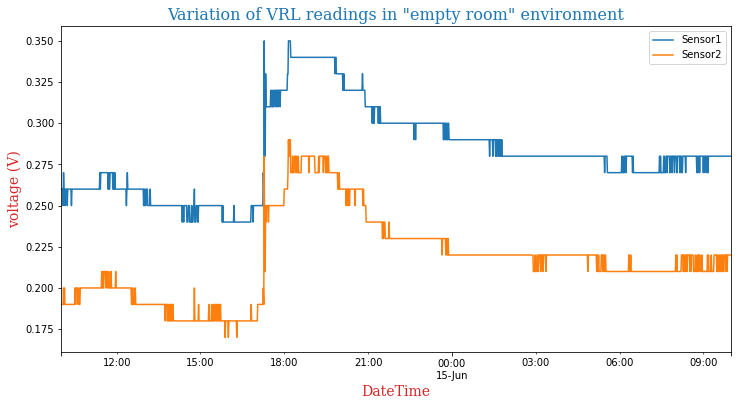

In [12]:
fdf = df[(df['date'] > '6/14/22 10:00 AM') & (df['date'] < '6/15/22 010:00 AM')]

ax = fdf.plot(x='date', y=["mq6_1","mq6_2"], 
              kind="line", figsize=(12, 6))

plt.title('Variation of VRL readings in "empty room" environment', fontdict=font_title)
plt.xlabel('DateTime',    fontdict=font)
plt.ylabel('voltage (V)', fontdict=font)
plt.legend(['Sensor1', 'Sensor2'], loc='best')


plt.show()

In [13]:
# MQ 6 Sensor 1

sensor1['Rs'] = [Rs(sensor1['Vcc'] , v, sensor1['RL'] ) for v in mq6_1["mq6_1"]]
sensor1['Ratio'] = [Ratio(rs, sensor1['Ro']) for rs in sensor1['Rs']]

ppm1 = {}
for gas in GASES:
    ppm1[gas] = []
    
for r in sensor1['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm1[gas].append(PPM(r, m, b))

for gas in GASES:
    mq6_1[gas] = ppm1[gas]

In [14]:
# MQ 6 Sensor 2

sensor2['Rs'] = [Rs(sensor2['Vcc'] , v, sensor2['RL'] ) for v in mq6_2["mq6_2"]]
sensor2['Ratio'] = [Ratio(rs, sensor2['Ro']) for rs in sensor2['Rs']]
  
ppm2 = {}
for gas in GASES:
    ppm2[gas] = []
    
for r in sensor2['Ratio']:
    for gas in GASES:    
        p1, p2 = getPoints(r, pList[gas])
        m = M(p1, p2)
        b = B(p1, m)
        ppm2[gas].append(PPM(r, m, b))
        
for gas in GASES:
    mq6_2[gas] = ppm2[gas]

In [15]:
mq6_1.describe()

,mq6_1,lpg,h2,ch4,co,alcohol
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,0.281975,7.428427,58.067436,9.913061,522.325011,135.174816
std,0.023686,1.550816,16.407515,2.293768,900.116619,90.653158
min,0.240000,4.988755,33.938320,6.378695,20.431603,39.227549
25%,0.270000,6.610598,49.296445,8.697515,127.394751,86.907375
50%,0.280000,7.213549,55.346384,9.575316,224.712584,111.219899
75%,0.290000,7.848820,61.901537,10.508265,389.007186,141.178324
max,0.350000,12.378604,113.269202,17.357712,5169.021838,509.095903


In [16]:
mq6_2.describe()

,mq6_2,lpg,h2,ch4,co,alcohol
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000
mean,0.217784,8.785052,72.898789,11.940215,1570.788124,224.121364
std,0.023117,2.301837,26.022789,3.474018,2949.555138,180.986483
min,0.170000,4.805200,32.292293,6.120652,16.012029,35.284416
25%,0.210000,7.907704,62.518173,10.595139,408.378554,144.191954
50%,0.220000,8.829435,72.361542,11.963324,729.102011,196.903574
75%,0.220000,8.829435,72.361542,11.963324,729.102011,196.903574
max,0.290000,17.083809,173.645536,24.752221,19353.821724,1074.574232


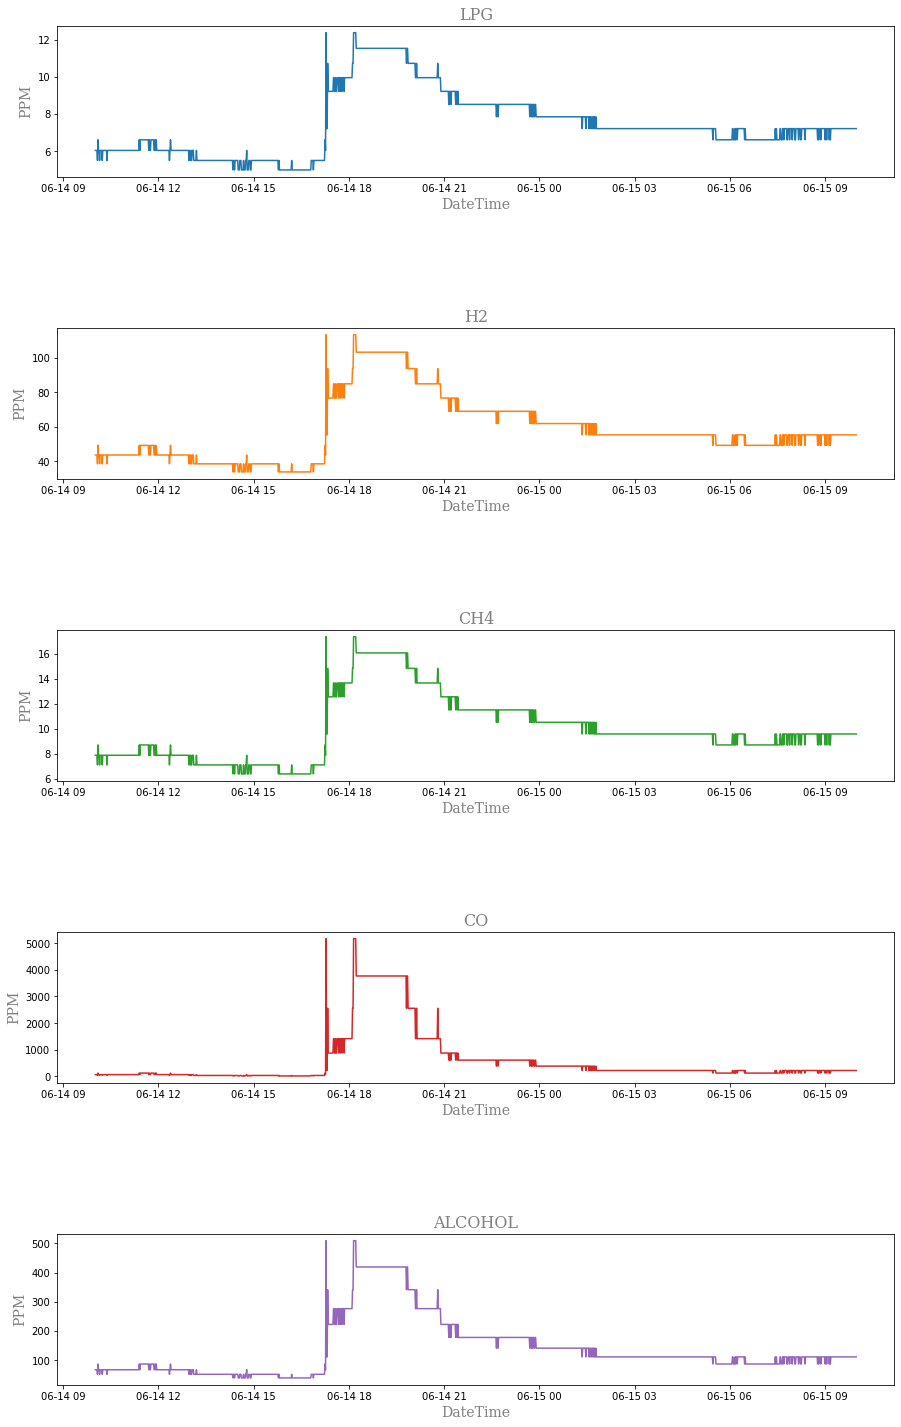

In [17]:
# Time Interval:
#           min: 2022-06-14 09:56:00
#           max: 2022-06-15 16:23:00 
  
fmq = mq6_1[(mq6_1['date'] > '6/14/22 10:00 AM') & (mq6_1['date'] < '6/15/22 010:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

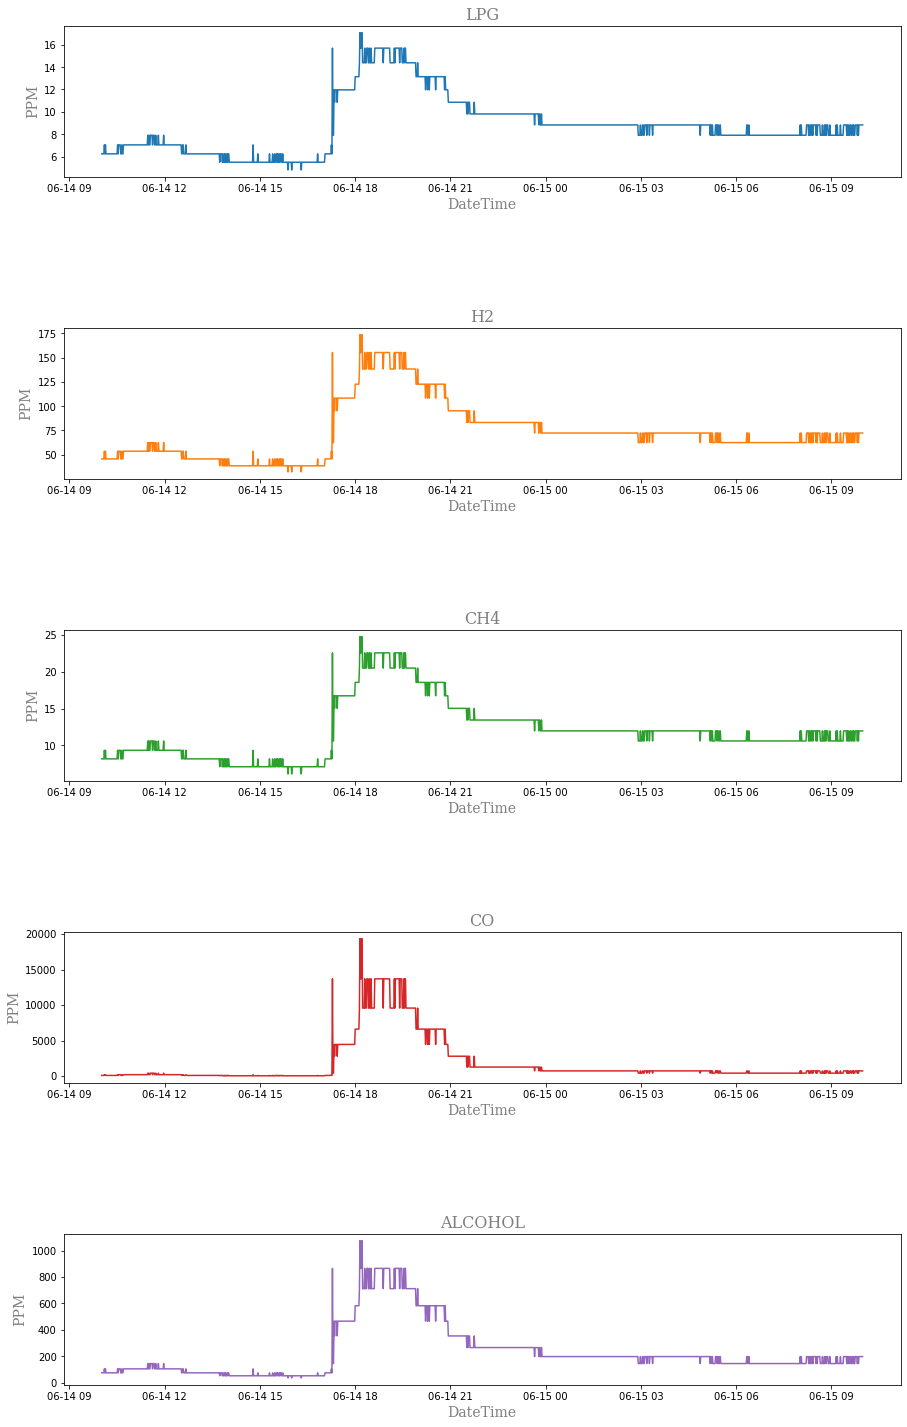

In [18]:
# Time Interval:
#           min: 2022-06-14 09:56:00
#           max: 2022-06-15 16:23:00 
  
fmq = mq6_2[(mq6_2['date'] > '6/14/22 10:00 AM') & (mq6_2['date'] < '6/15/22 010:00 AM')]

plt.figure(figsize=(15, 25))
plt.subplots_adjust(hspace = 1)

for idx in range(len(GASES)):
    plt.subplot(len(GASES) * 100 + 11 + idx)
    plt.plot(fmq['date']         , fmq[GASES[idx]],        color=colors[idx])
    plt.xlabel('DateTime'        , fontdict=font,          color='tab:gray')
    plt.ylabel('PPM'             , fontdict=font,          color='tab:gray')
    plt.title(GASES[idx].upper() , fontdict=font_title,    color='tab:gray')
    


plt.show()

In [19]:
# Save in excel file
mq6_1.to_csv('mq6_1.csv')
mq6_2.to_csv('mq6_2.csv')